實作說明：
嘗試至少以下述方式之一(或用其他方式)提高正確率，以Matplotlib loss/accuracy 圖示之 

Dropout Rate(目前 0.2)

Batch Normalization (API?)

Kernel Size (目前 3 x 3)

Activation Function (目前 Relu)

Optimization: (目前 adam)

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# 更多輸入

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# 載入影像
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# (28x28)乃 2D!
# convolution 需要 height x width x color 我們得 expand_dims
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# 共有多少種物品
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

加註：以下是model的參數數目及計算方法，我們可以假設前後的特徵圖(feature maps)是全連接(fully connected)的，，就像dense一樣，而參數數目是根據filter而非feature map，這樣就比較容易理解。另請參考以下

https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

320 = (3 x 3 x 1) x 32 = 320 = ((filter x filter x input) + 1 ) * output

18496 = (3 x 3 x 32 + 1 ) x 64

73856 = ( 3 x 3 x 64 + 1) * 128 

262656 = (512 + 1) x 512

5130 = (512 + 1) * 10 = 5130


關於functional API 函式接口

In [6]:
# 函數式接口 functional API 建模 的另一種寫法
# 如以執行上一個cell就不用執行這個
i = Input(shape=x_train[0].shape)
x1 = Conv2D(32, (3, 3), strides=2, activation='relu')
x = x1(i)
x2 = Conv2D(64, (3, 3), strides=2, activation='relu')
x = x2(x)
x3 = Conv2D(128, (3, 3), strides=2, activation='relu')
x = x3(x)
f1 = Flatten()
x = f1(x)
dr1 = Dropout(0.2)
x = dr1(x)
de1 = Dense(512, activation='relu')
x = de1(x)
dr2 = Dropout(0.2)
x = dr2(x)
de2 = Dense(K, activation='softmax')
x = de2(x)
model = Model(i, x)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

In [ ]:
# your improved model code here to replace the above one

In [8]:
# 編譯與訓練
# 請確認用GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 42s 6ms/step - loss: 0.5176 - accuracy: 0.8092 - val_loss: 0.4222 - val_accuracy: 0.8449
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3638 - accuracy: 0.8631 - val_loss: 0.3540 - val_accuracy: 0.8685
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3127 - accuracy: 0.8812 - val_loss: 0.3227 - val_accuracy: 0.8791
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2787 - accuracy: 0.8957 - val_loss: 0.3188 - val_accuracy: 0.8822
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2519 - accuracy: 0.9057 - val_loss: 0.3266 - val_accuracy: 0.8798
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2322 - accuracy: 0.9123 - val_loss: 0.2987 - val_accuracy: 0.8925
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2129 - accuracy: 0.9191 - val_loss: 0.2969 - val_ac

In [ ]:
#your improved optimization code here to replace the above one

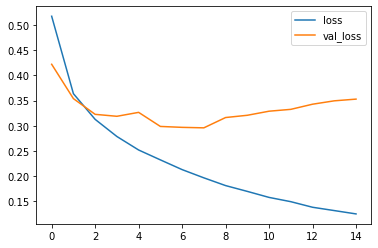

In [9]:
# 繪出迭代損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

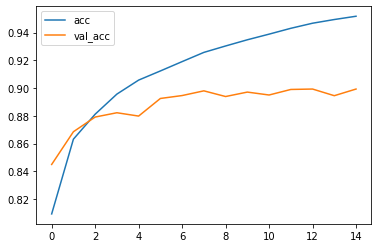

In [10]:
# 繪出迭代精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[824   2  19  19   2   1 131   0   2   0]
 [  2 969   1  16   8   0   2   0   2   0]
 [ 18   0 839  14  57   0  72   0   0   0]
 [ 12   4  16 908  33   0  27   0   0   0]
 [  0   0  55  24 857   0  64   0   0   0]
 [  0   0   1   2   0 964   0  22   1  10]
 [ 87   0  52  28  90   0 735   0   8   0]
 [  0   0   0   0   0   9   0 960   0  31]
 [  5   0   4   2   4   1  10   3 970   1]
 [  0   0   0   0   0   3   1  29   0 967]]


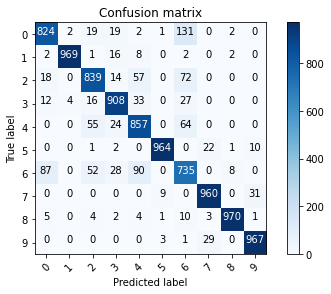

In [11]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# 映射標籤
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

只有1元素的 tuple 物件: (array([  23,   25,   29, ..., 9969, 9972, 9977]),)
type: <class 'tuple'>
array object: [  23   25   29 ... 9969 9972 9977]
有多少測試樣本: (10000,)
有多少猜錯: (1007,)
隨機選一個猜錯的 5090


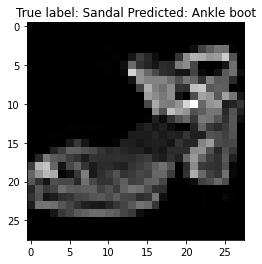

In [31]:
# 展示分類錯誤樣本
print ("只有1元素的 tuple 物件:", np.where(p_test != y_test))
print ("type:", type(np.where(p_test != y_test)))

misclassified_idx = np.where(p_test != y_test)[0] 

print ("array object:", np.where(p_test != y_test)[0])
print ("有多少測試樣本:",y_test.shape)
print ("有多少猜錯:",misclassified_idx.shape)

i = np.random.choice(misclassified_idx)
print ("隨機選一個猜錯的", i)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));